# 金融詐欺偵測(模擬資料)
來源: [Synthetic Financial Datasets For Fraud Detection](https://www.kaggle.com/ntnu-testimon/paysim1)

## 資料介紹

這個資料集是基於非洲行動支付平台商在某月的財務日誌中所擷取出來的真實交易紀錄

資料集的特徵： 
* step - 每單位為現實世界的1小時，從1到744,一共為30天
* type - 交易模式，有CASH-IN 存入現金, CASH-OUT 提出現金, DEBIT 借出, PAYMENT 支付, TRANSFER 轉帳
* amount - 每次交易的金額 
* nameOrig - 執行交易之帳戶 
* oldbalanceOrg - 交易前金額 
* newbalanceOrig - 交易後金額 
* nameDest - 接受交易之帳戶 
* oldbalanceDest - 交易前金額,如果是商業客戶不會有紀錄 
* newbalanceDest - 交易後金額,如果是商業客戶不會有紀錄 
* isFraud - 是否為詐欺交易 
* isFlaggedFraud - 轉帳標記，指可能企圖非法轉帳，嘗試單次超過200,000金額的轉帳

In [192]:
import pandas as pd
from pprint import pprint
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
df = pd.read_csv(r".\paysim1.csv")

## Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


datatype正確，而且沒有空值，故不需data cleaning

In [4]:
df.isnull().values.any()

False

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
def CatUniDraw(x):
    x1 = pd.DataFrame(x.value_counts())
    x1.columns = ["Count"]
    x2 = ((x1/x.count())*100).round(2)
    x2.columns = ["Percentage"]
    print(x1)
    print("\n")
    print(x2)
    if (len(x1)) <= 20:    
        x1.plot.bar()
        plt.show()
    else:
        pass

In [7]:
dfNF = df[df.isFraud == 0]
dfF = df[df.isFraud == 1]

## Target feature - isFraud

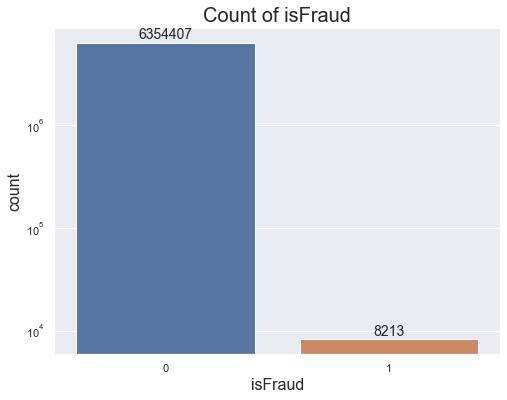

In [195]:
#isFarud count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data = df, x = "isFraud")
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height),
                xy = (p.get_x() + p.get_width() / 2, height),
                ha = 'center',
                va = 'bottom', 
                xytext = (0, 1), # distance with bar 
                textcoords = 'offset points',
                fontsize = 14)
plt.yscale("log") # to show y-axis as log scale
plt.title("Count of isFraud",fontsize = 20)
plt.ylabel("count", fontsize = 16)
plt.xlabel("isFraud",fontsize = 16)
plt.show()

### Imbalanced Data

這個資料集是不平衡資料，若要預測詐欺，可以用過採樣的方法來增加在機器學習的準確度。

### isFlaggedFraud(轉帳標記)

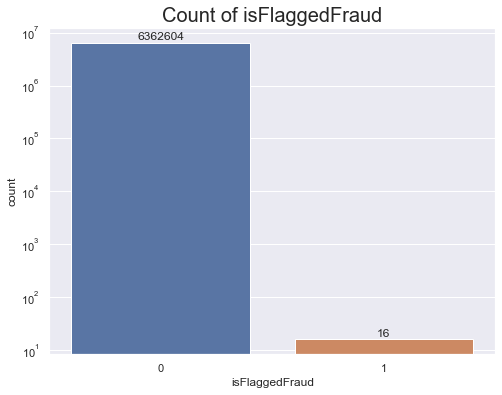

In [186]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data = df, x = "isFlaggedFraud")
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height),
                xy = (p.get_x() + p.get_width() / 2, height),
                ha = 'center',
                va = 'bottom',
                xytext = (0, 1), # distance with bar 
                textcoords = 'offset points')
plt.yscale("log") # to show y-axis as log scale
plt.title("Count of isFlaggedFraud",fontsize = 20)
plt.ylabel("count", fontsize = 16)
plt.xlabel("isFlaggedFraud",fontsize = 16)
plt.show()

所有被標記為轉帳的交易都是詐欺，因為轉帳標記記錄很少，所以這個特徵只能找出少部分的詐欺(Precison高，Recll低)。

isFraud,0,1
isFlaggedFraud,,
0,6354407,8197
1,0,16


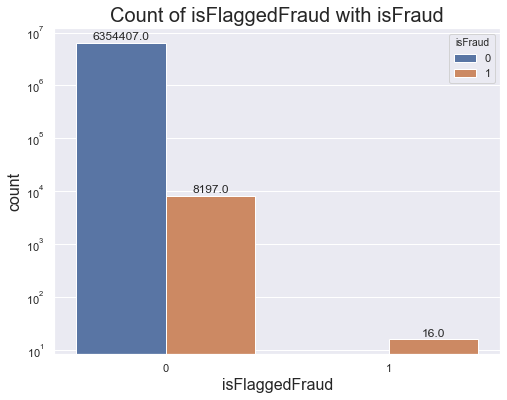

In [196]:
tabFlagged = pd.crosstab(df.isFlaggedFraud,df.isFraud)
display(tabFlagged)
plt.figure(figsize=(8, 6))
ax = sns.countplot(data = df, x = "isFlaggedFraud",hue = "isFraud")
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height),
                xy = (p.get_x() + p.get_width() / 2, height),
                ha = 'center',
                va = 'bottom', 
                xytext = (0, 1), # distance with bar 
                textcoords = 'offset points')
plt.yscale("log") # to show y-axis as log scale
plt.title("Count of isFlaggedFraud with isFraud",fontsize = 20)
plt.ylabel("count", fontsize = 16)
plt.xlabel("isFlaggedFraud",fontsize = 16)
plt.show()

有409100筆轉帳金額超過200,000，其中只有16筆有轉帳標記

In [11]:
crosstab = df[(df.type == "TRANSFER") & (df.amount >= 200000)]
pd.crosstab(crosstab.type, crosstab.isFlaggedFraud)
#df[(df.type == "TRANSFER") & (df.amount >= 200000)].pivot_table(index = "type", columns = "isFlaggedFraud", aggfunc = len)

isFlaggedFraud,0,1
type,,
TRANSFER,409094,16


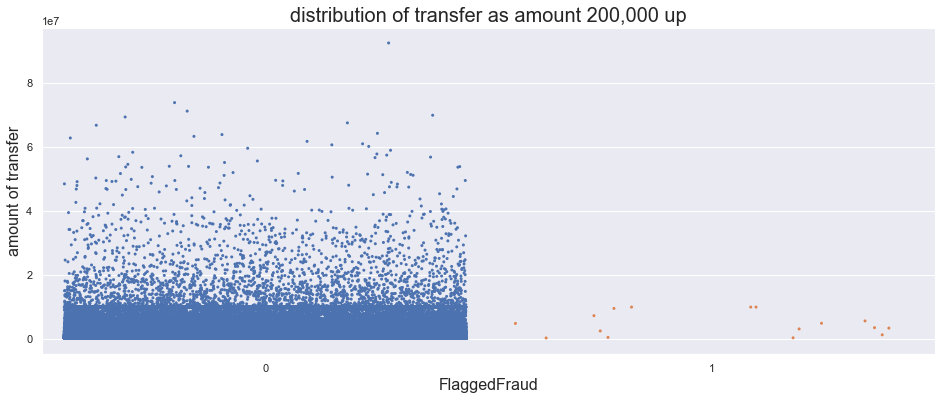

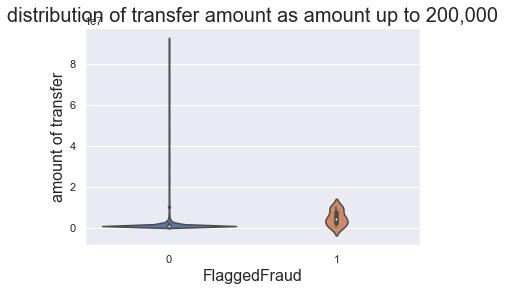

In [199]:
plt.figure(figsize=(16, 6))
ax = df[(df.type == "TRANSFER") & (df.amount >= 200000)]
sns.stripplot(x = "isFlaggedFraud", y = "amount", jitter = 0.45 ,size = 3, data = ax)
plt.xlabel("FlaggedFraud", fontsize = 16)
plt.ylabel("amount of transfer", fontsize = 16)
plt.title("distribution of transfer as amount 200,000 up",fontsize = 20)
plt.show()

sns.violinplot(x = "isFlaggedFraud", y = "amount", data = ax)
plt.xlabel("FlaggedFraud", fontsize = 16)
plt.ylabel("amount of transfer", fontsize = 16)
plt.title("distribution of transfer amount as amount up to 200,000",fontsize = 20)
plt.show()

### Step(時間)
Creat new features by changing form of step  
* 交易紀錄有時間上的規律  
    * 400小時左右頻率變化，交易次數大幅下降
    * 以7天為單位，交易次數總和在第1天最多，第5天最少
* 以小時為單位的觀察，可以發現有些時段不會有正常的交易，但始終都會有Fraud Transcation，這可能對於分辨Fraud有幫助
* Fraud的次數很穩定

In [13]:
df["date"] = df["step"].map(lambda x: int((x-1)/24)+1)
df["hour"] = df["step"].map(lambda x:(x-1)%24)
df["day"] = df["date"].map(lambda x: 7 if x%7 == 0 else x%7)
df["week"] = df["date"].map(lambda x: x/7 if x%7 == 0 else int(x/7)+1).astype(int)
#df["day"] = df["step"].map(lambda x: int(x/24) if x%24 == 0  else int(x/24)+1)
#df["hour"] = df["step"].map(lambda x:24 if x%24 == 0 else x%24)

In [14]:
df[["step","week","day","date","hour"]]

,step,week,day,date,hour
0,1,1,1,1,0
1,1,1,1,1,0
2,1,1,1,1,0
3,1,1,1,1,0
4,1,1,1,1,0
...,...,...,...,...,...
6362615,743,5,3,31,22
6362616,743,5,3,31,22
6362617,743,5,3,31,22
6362618,743,5,3,31,22


以小時為單位觀察交易次數記錄，在400多個小時的時候，交易的頻率開始改變

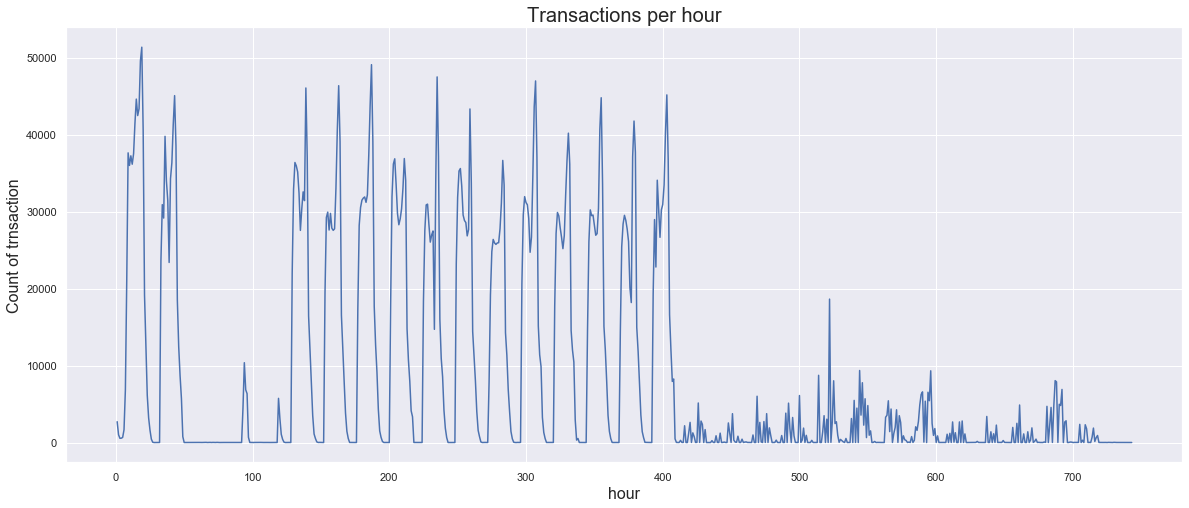

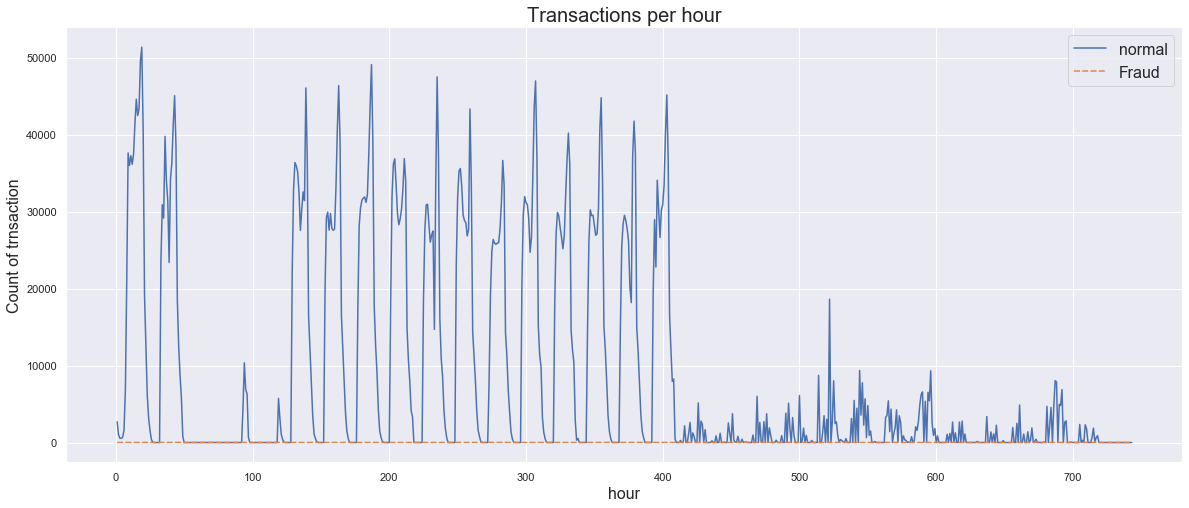

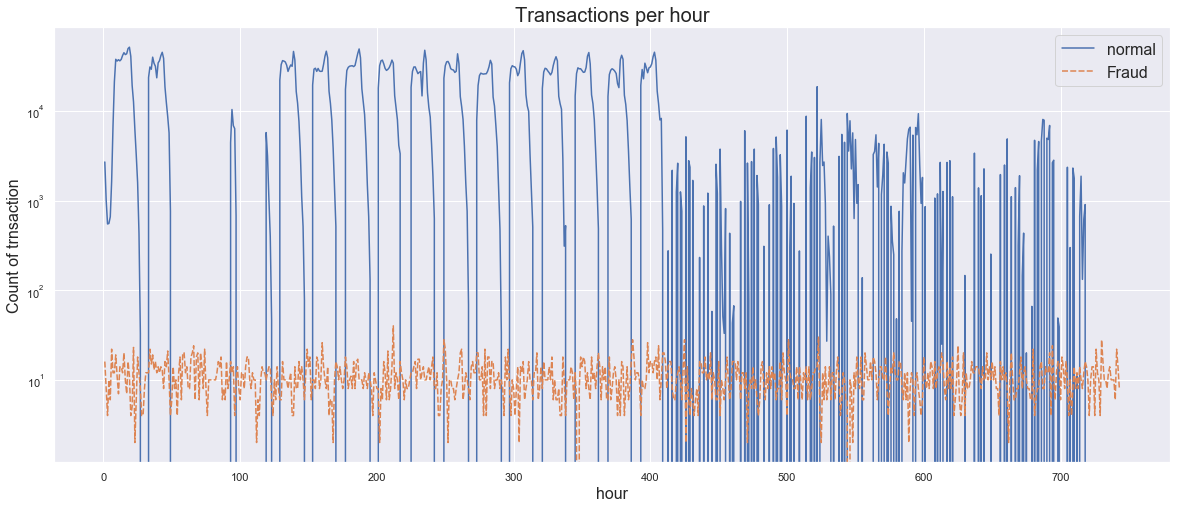

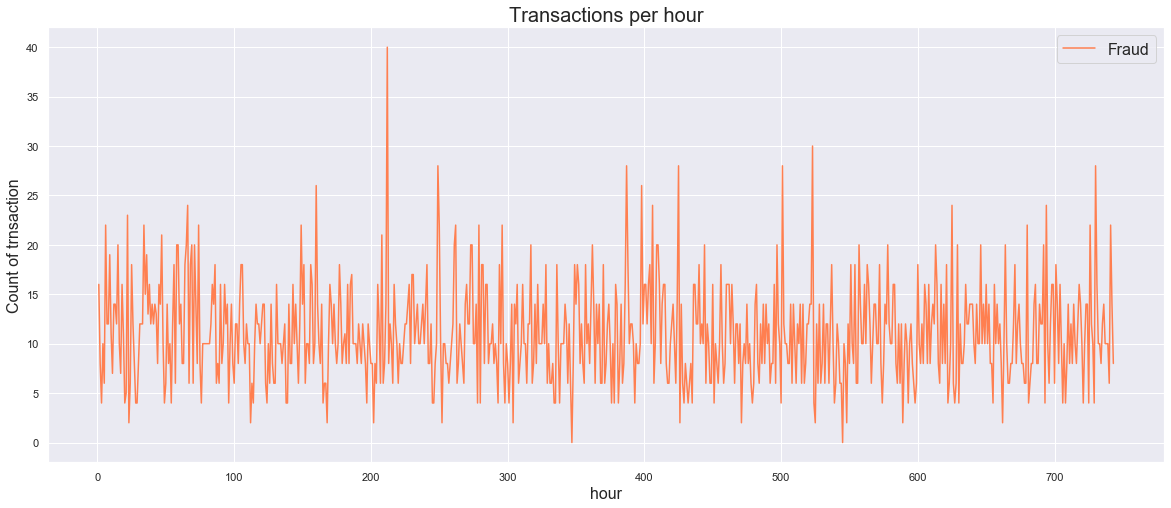

In [15]:
plt.figure(figsize=(20, 8))
ax = df.groupby("step").count()
sns.lineplot(x = ax.index, y = "type", data = ax)
plt.xlabel("hour", fontsize = 16)
plt.ylabel("Count of trnsaction", fontsize = 16)
plt.title("Transactions per hour", fontsize=20)
plt.show()

plt.figure(figsize=(20, 8))
axsp = pd.crosstab(df.step, df.isFraud)
sns.lineplot(data = axsp)
plt.legend(["normal","Fraud"],fontsize = 16)
plt.xlabel("hour", fontsize = 16)
plt.ylabel("Count of trnsaction", fontsize = 16)
plt.title("Transactions per hour", fontsize=20)
plt.show()

plt.figure(figsize=(20, 8))
axsp = pd.crosstab(df.step, df.isFraud)
sns.lineplot(data = axsp)
plt.legend(["normal","Fraud"],fontsize = 16)
plt.xlabel("hour", fontsize = 16)
plt.ylabel("Count of trnsaction", fontsize = 16)
plt.title("Transactions per hour", fontsize=20)
plt.yscale("log")
plt.show()

plt.figure(figsize=(20, 8))
axsp = pd.crosstab(df.step, df.isFraud)
sns.lineplot(data = axsp[1], color = "coral")
plt.legend(["Fraud"],fontsize = 16)
plt.xlabel("hour", fontsize = 16)
plt.ylabel("Count of trnsaction", fontsize = 16)
plt.title("Transactions per hour", fontsize=20)
plt.show()

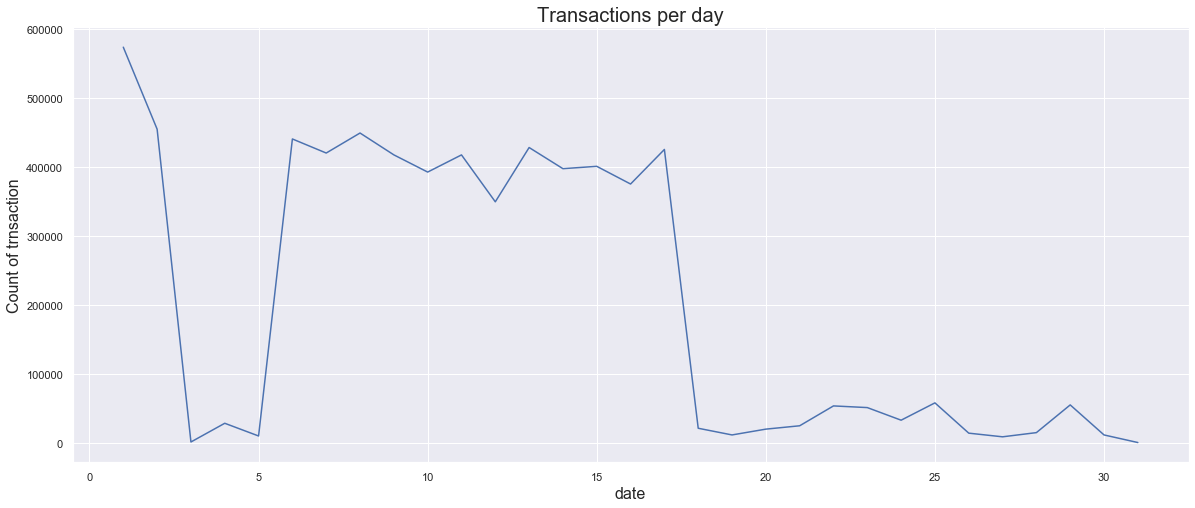

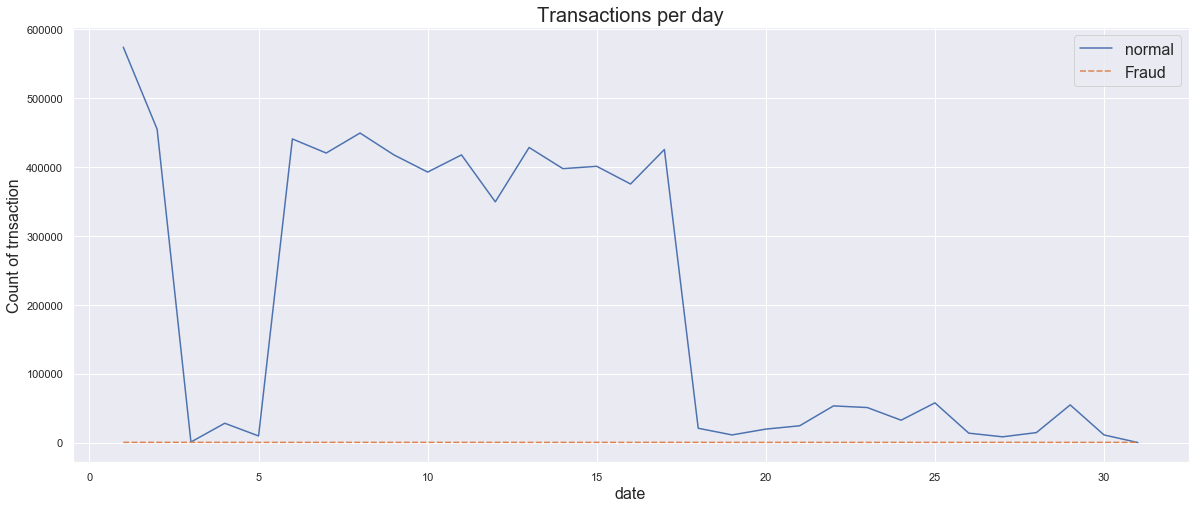

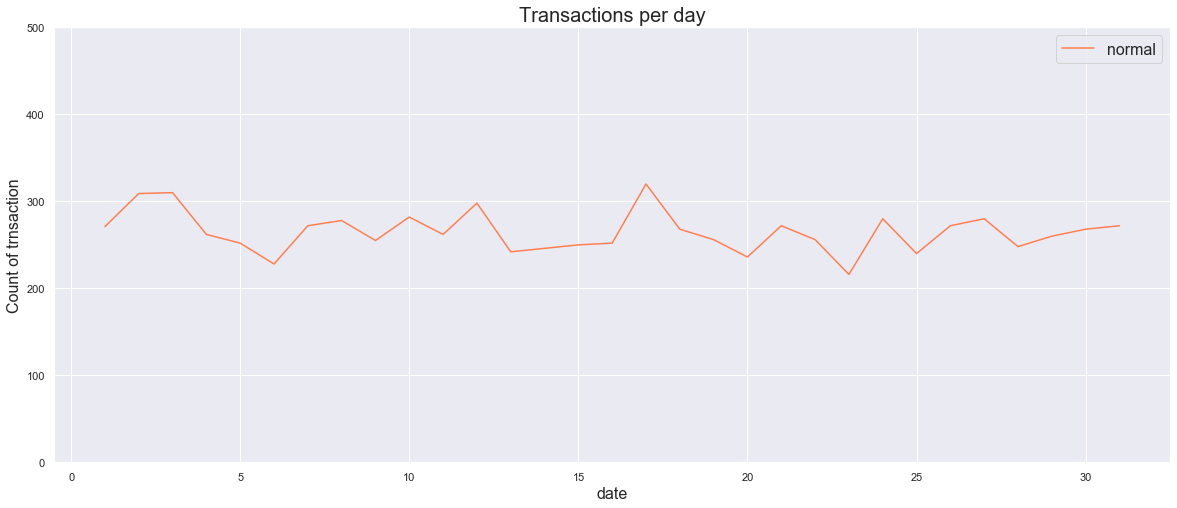

In [16]:
plt.figure(figsize=(20, 8))
ax = df.groupby("date").count()
sns.lineplot(x = ax.index, y = "type", data = ax)
plt.xlabel("date", fontsize = 16)
plt.ylabel("Count of trnsaction", fontsize = 16)
plt.title("Transactions per day", fontsize=20)
plt.show()

plt.figure(figsize=(20, 8))
axsp = pd.crosstab(df.date, df.isFraud)
sns.lineplot(data = axsp)
plt.legend(["normal","Fraud"],fontsize = 16)
plt.xlabel("date", fontsize = 16)
plt.ylabel("Count of trnsaction", fontsize = 16)
plt.title("Transactions per day", fontsize=20)
plt.show()

plt.figure(figsize=(20, 8))
axsp = pd.crosstab(df.date, df.isFraud)
sns.lineplot(data = axsp[1], color = "coral")
plt.legend(["normal","Fraud"],fontsize = 16)
plt.xlabel("date", fontsize = 16)
plt.ylabel("Count of trnsaction", fontsize = 16)
plt.ylim(0,500)
plt.title("Transactions per day", fontsize=20)
plt.show()

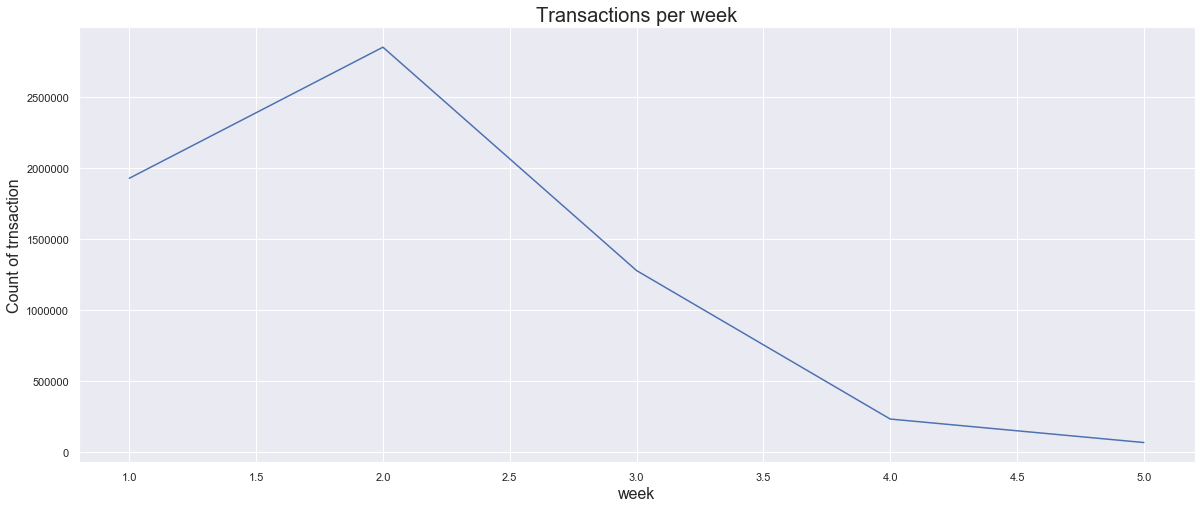

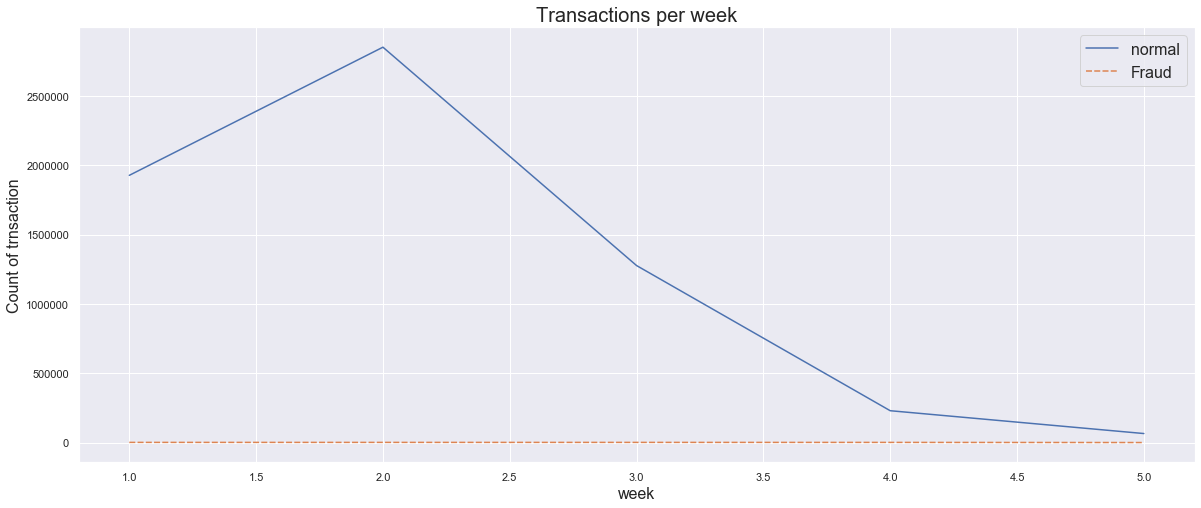

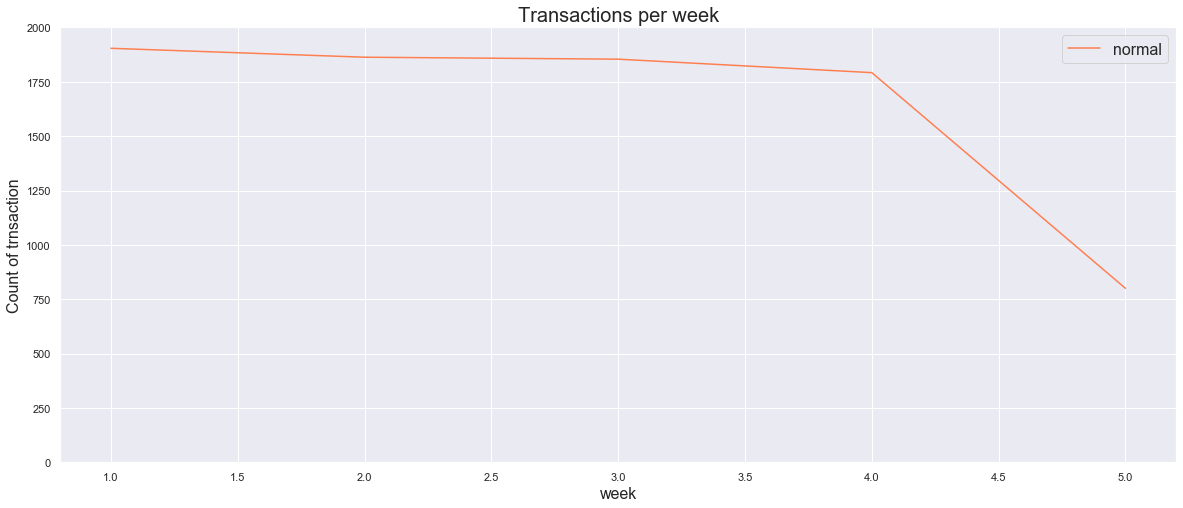

In [17]:
plt.figure(figsize=(20, 8))
ax = df.groupby("week").count()
sns.lineplot(x = ax.index, y = "type", data = ax)
plt.xlabel("week", fontsize = 16)
plt.ylabel("Count of trnsaction", fontsize = 16)
plt.title("Transactions per week", fontsize=20)
plt.show()

plt.figure(figsize=(20, 8))
axsp = pd.crosstab(df.week, df.isFraud)
sns.lineplot(data = axsp)
plt.legend(["normal","Fraud"],fontsize = 16)
plt.xlabel("week", fontsize = 16)
plt.ylabel("Count of trnsaction", fontsize = 16)
plt.title("Transactions per week", fontsize=20)
plt.show()

plt.figure(figsize=(20, 8))
axsp = pd.crosstab(df.week, df.isFraud)
sns.lineplot(data = axsp[1], color = "coral")
plt.legend(["normal","Fraud"],fontsize = 16)
plt.xlabel("week", fontsize = 16)
plt.ylim(0,2000)
plt.ylabel("Count of trnsaction", fontsize = 16)
plt.title("Transactions per week", fontsize=20)
plt.show()

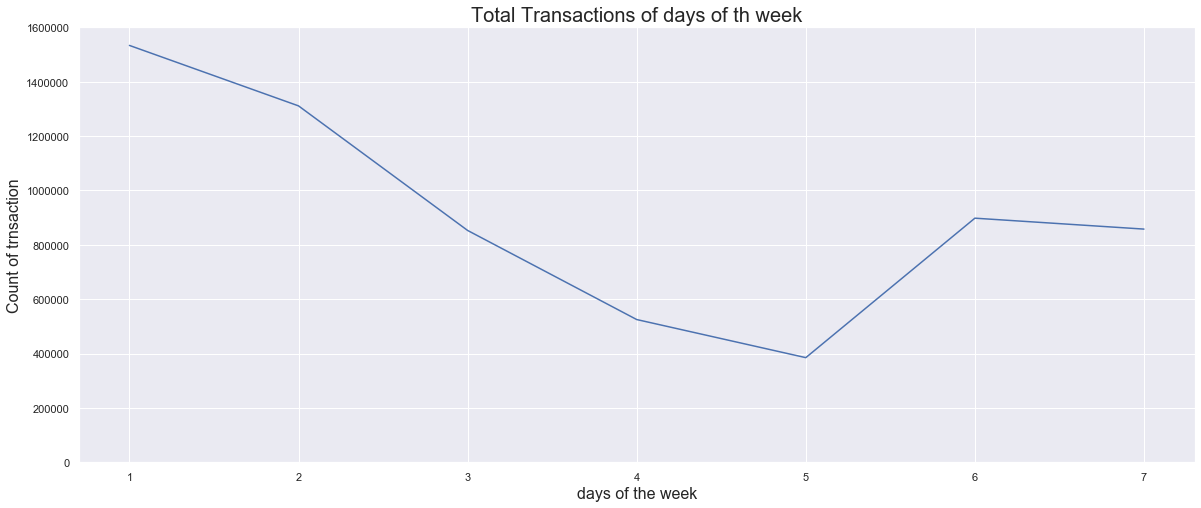

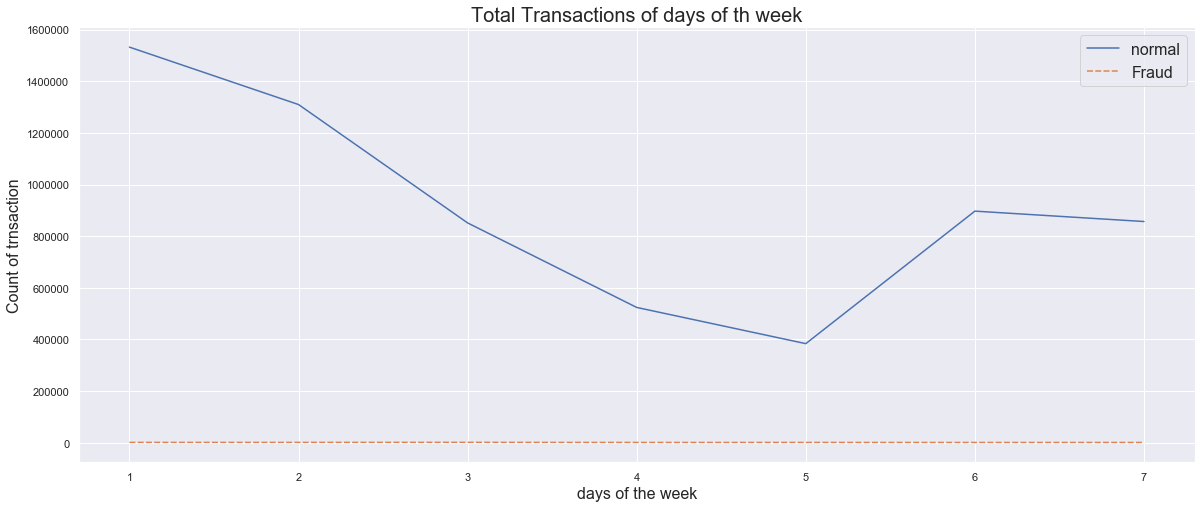

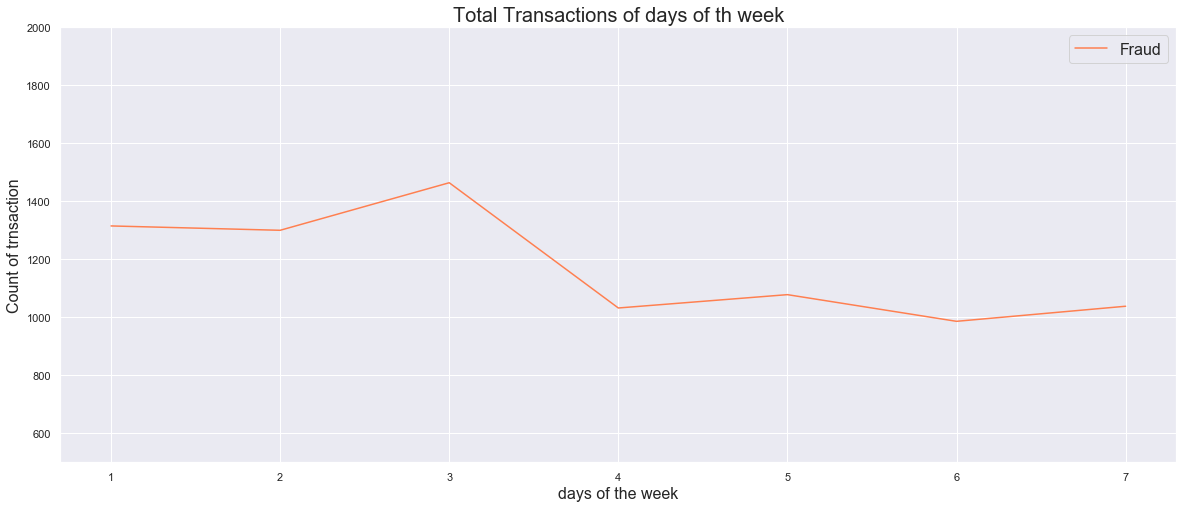

In [18]:
plt.figure(figsize=(20, 8))
ax = df.groupby("day").count()
sns.lineplot(x = ax.index, y = "type", data = ax)
plt.xlabel("days of the week", fontsize = 16)
plt.ylim(0,1600000)
plt.ylabel("Count of trnsaction", fontsize = 16)
plt.title("Total Transactions of days of th week", fontsize=20)
plt.show()

plt.figure(figsize=(20, 8))
axsp = pd.crosstab(df.day, df.isFraud)
sns.lineplot(data = axsp)
plt.legend(["normal","Fraud"],fontsize = 16)
plt.xlabel("days of the week", fontsize = 16)
plt.ylabel("Count of trnsaction", fontsize = 16)
plt.title("Total Transactions of days of th week", fontsize=20)
plt.show()

plt.figure(figsize=(20, 8))
axsp = pd.crosstab(df.day, df.isFraud)
sns.lineplot(data = axsp[1], color = "coral")
plt.legend(["Fraud"],fontsize = 16)
plt.xlabel("days of the week", fontsize = 16)
plt.ylabel("Count of trnsaction", fontsize = 16)
plt.ylim(500,2000)
plt.title("Total Transactions of days of th week", fontsize=20)
plt.show()

In [200]:
ax = df.groupby(["hour","isFraud"])["step"].count().unstack()
axp = ax.agg(lambda x: x/x.sum()*100,axis = 1).round(2)
print(ax,"\n")
print(axp)

isFraud       0    1
hour                
0         26753  358
1          8646  372
2          1681  326
3           967  274
4          1275  366
5          3062  358
6          8660  328
7         26547  368
8        283177  341
9        425354  375
10       445668  324
11       483079  339
12       468128  346
13       439300  353
14       416345  341
15       441267  345
16       439588  353
17       580166  343
18       647472  342
19       553388  340
20       247459  347
21       194204  351
22       140934  323
23        71287  300 

isFraud      0      1
hour                 
0        98.68   1.32
1        95.87   4.13
2        83.76  16.24
3        77.92  22.08
4        77.70  22.30
5        89.53  10.47
6        96.35   3.65
7        98.63   1.37
8        99.88   0.12
9        99.91   0.09
10       99.93   0.07
11       99.93   0.07
12       99.93   0.07
13       99.92   0.08
14       99.92   0.08
15       99.92   0.08
16       99.92   0.08
17       99.94   0.06
18       99.

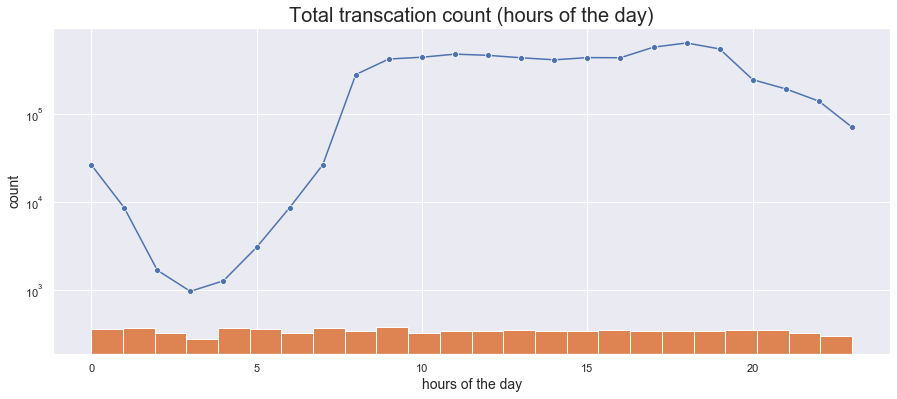

<Figure size 1080x432 with 0 Axes>

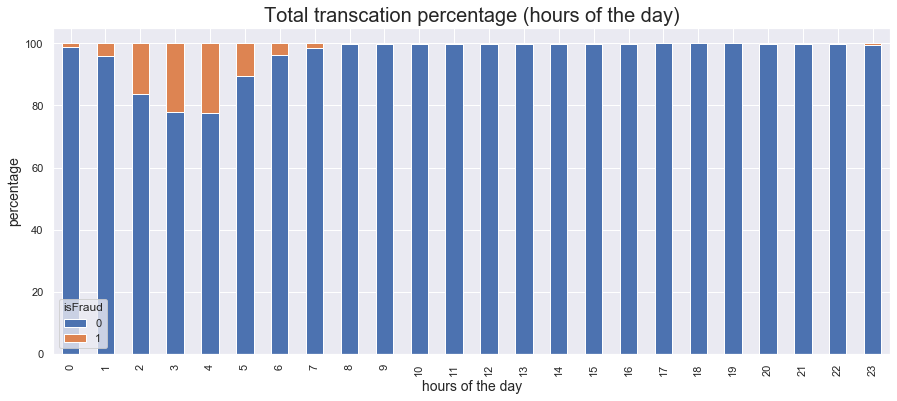

In [206]:
plt.figure(figsize=(15,6))
plt.yscale("log")
sns.lineplot(data=ax[0], linestyle='-', marker='o')
df[df.isFraud == 1]["hour"].hist(bins = 24)
plt.ylabel("count", fontsize = 14)
plt.xlabel("hours of the day", fontsize = 14)
plt.title("Total transcation count (hours of the day)",fontsize = 20)
plt.show()

plt.figure(figsize=(15,6))
axp.plot.bar(stacked =True,figsize = (15,6))
plt.ylabel("percentage", fontsize = 14)
plt.xlabel("hours of the day", fontsize = 14)
plt.title("Total transcation percentage (hours of the day)",fontsize = 20)
plt.show()

### Type (交易模式)

所有的詐欺只發生在轉帳跟提領現金

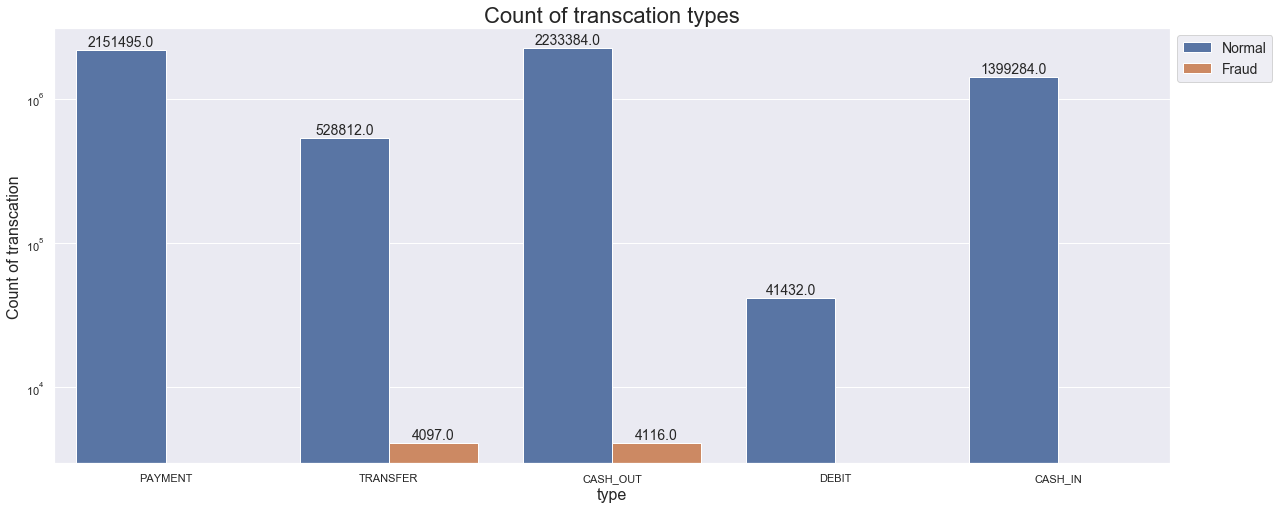

In [208]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(data = df, x = "type",hue = "isFraud")
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height),
                xy = (p.get_x() + p.get_width() / 2, height),
                ha = 'center',
                va = 'bottom', 
                xytext = (0, 1), # distance with bar 
                textcoords = 'offset points',
                fontsize = 14)
plt.yscale("log") # to show y-axis as log scale
plt.legend(["Normal","Fraud"],loc='upper left',bbox_to_anchor=(1,1), ncol=1,fontsize = 14)
plt.ylabel("Count of transcation",fontsize = 16)
plt.xlabel("type",fontsize = 16)
plt.title("Count of transcation types", fontsize = 22)
plt.show()

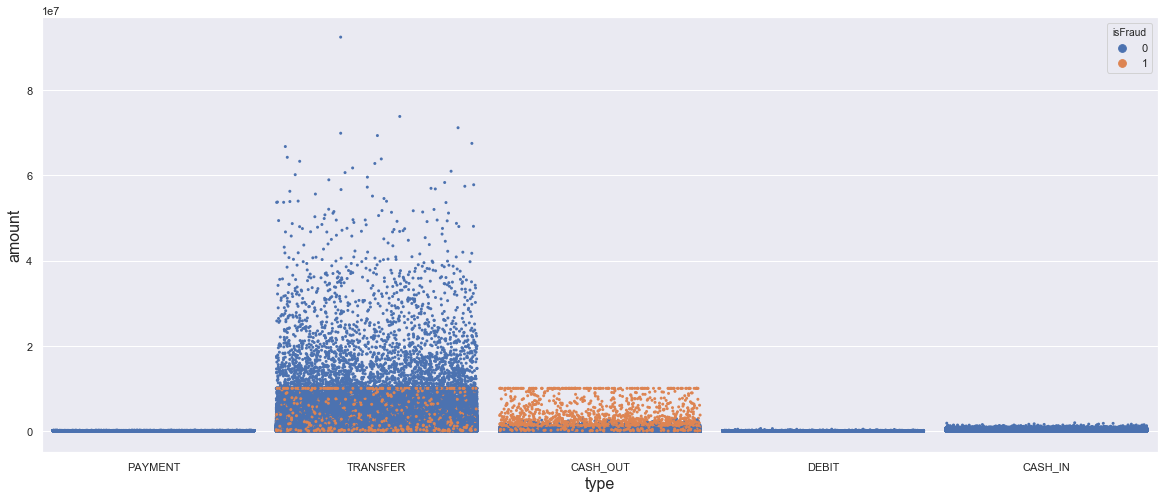

In [209]:
plt.figure(figsize=(20, 8))
ax = sns.stripplot(x="type", y="amount", hue="isFraud", data=df, jitter = 0.45 ,size = 3)
plt.ylabel("amount", fontsize = 16)
plt.xlabel("type", fontsize = 16)
plt.show()


### 交易金額 amount
所有的詐欺的金額最高只有100萬

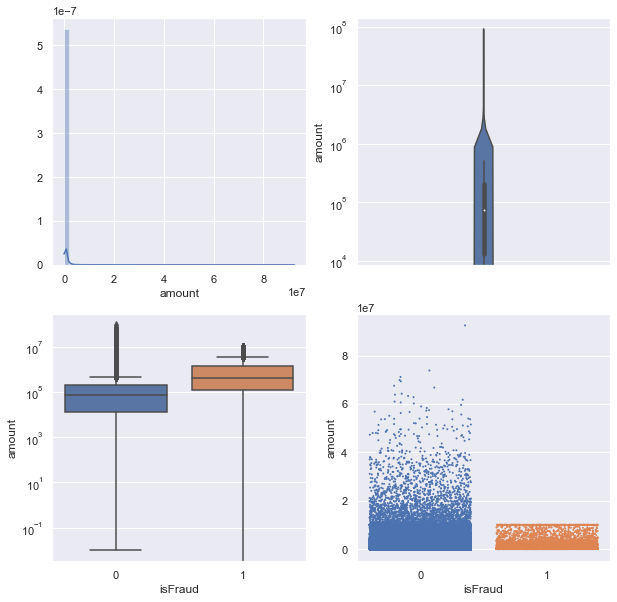

In [144]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
a = sns.distplot(df.amount, ax = axs[0][0])
b = sns.violinplot(y = "amount",data = df, ax = axs[0][1])
axs[0][1].set_yscale("log")
c = sns.boxplot(x = "isFraud", y = "amount", data = df, ax = axs[1][0])
axs[1][0].set_yscale("log")
d = sns.stripplot(x = "isFraud", y = "amount", jitter = 0.4, size = 2, data = df, ax = axs[1][1])

### NameOrig

### Orig 執行交易方

每個交易方的交易次數大多只有1次，只有9000多個交易方有超過2次的交易次數，所有的詐欺交易都只交易1次

In [29]:
Origcount = df.groupby("nameOrig").count()
OrigcountF = dfF.groupby("nameOrig").count()

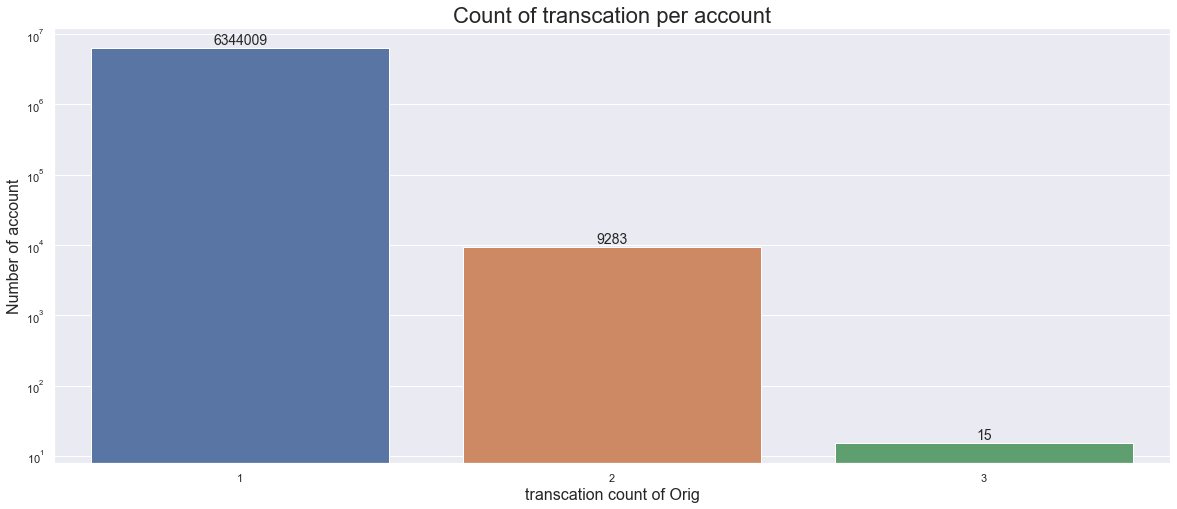

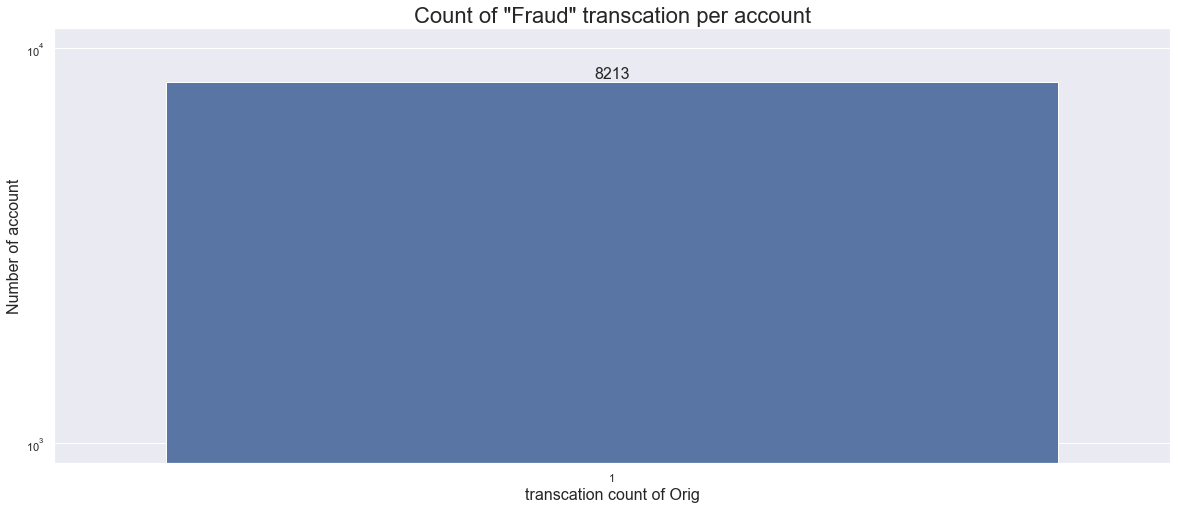

In [216]:
plt.figure(figsize = (20,8))
ax = sns.countplot(x = "type", data = Origcount)
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height),
                xy = (p.get_x() + p.get_width() / 2, height),
                ha = 'center',
                va = 'bottom', 
                xytext = (0, 1), # distance with bar 
                textcoords = 'offset points',
                fontsize = 14)
plt.yscale("log") # to show y-axis as log scale
plt.xlabel("transcation count of Orig", fontsize = 16)
plt.ylabel("Number of account", fontsize = 16)
plt.title("Count of transcation per account", fontsize = 22)
plt.show()

plt.figure(figsize = (20,8))
ax = sns.countplot(x = "type",data = OrigcountF)
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height),
                xy = (p.get_x() + p.get_width() / 2, height),
                ha = 'center',
                va = 'bottom', 
                xytext = (0, 1), # distance with bar 
                textcoords = 'offset points',
                fontsize = 16)
plt.yscale("log") # to show y-axis as log scale
plt.xlabel("transcation count of Orig", fontsize = 16)
plt.ylabel("Number of account", fontsize = 16)
plt.title("Count of \"Fraud\" transcation per account", fontsize = 22)
plt.show()

### OrigInitial
to be created by nameOrig

一共有C1~C8，8種類型的執行交易方帳戶開頭，__不管資料多寡，每種開頭是否是詐欺交易的比例是 99.87 : 0.13 (Normal:Fraud)__  
也就是有可能藉由這個比例去預估未來的資料裡面，大概會有多少筆的詐欺紀錄

In [31]:
df["OrigInitial"] = df.nameOrig.map(lambda x:x[:2])

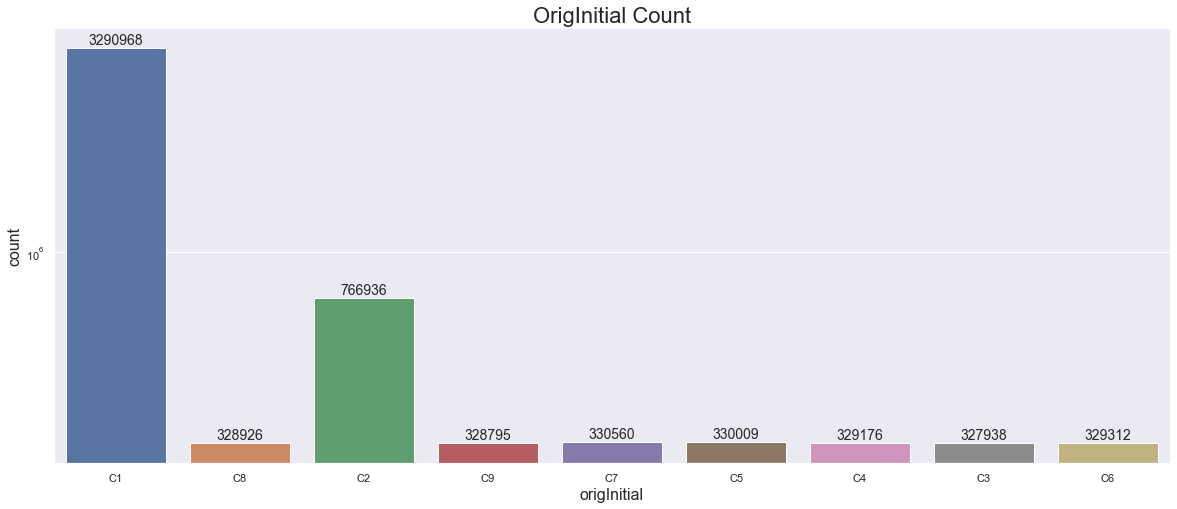

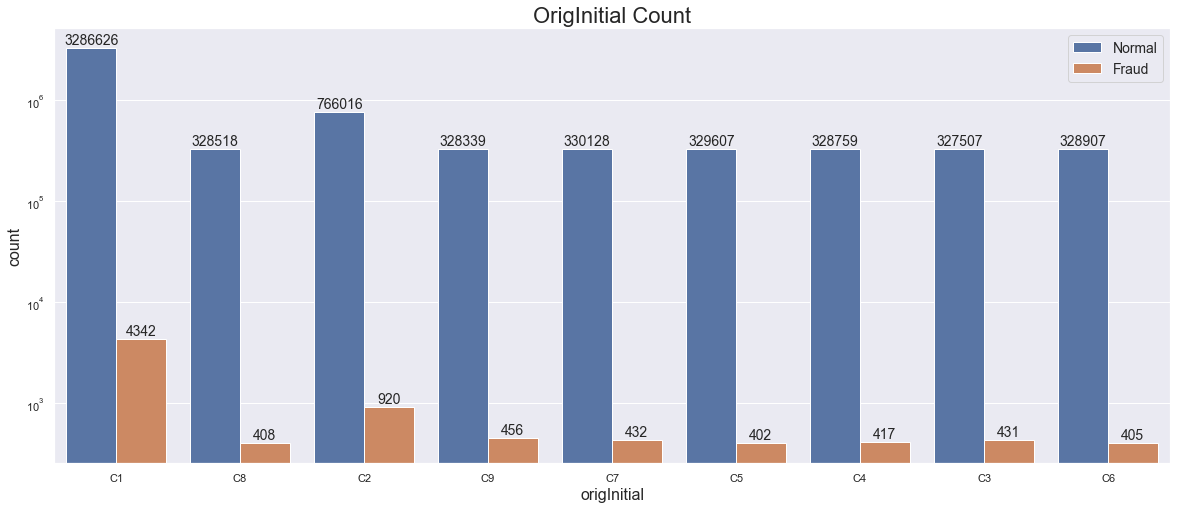

In [212]:
plt.figure(figsize = (20, 8))
ax = sns.countplot(x = "OrigInitial", data = df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height),
                xy = (p.get_x() + p.get_width() / 2, height),
                ha = 'center',
                va = 'bottom', 
                xytext = (0, 1), # distance with bar 
                textcoords = 'offset points',
                fontsize = 14)
plt.yscale("log") # to show y-axis as log scale
plt.xlabel("origInitial", fontsize = 16)
plt.ylabel("count", fontsize = 16)
plt.title("OrigInitial Count", fontsize = 22)
plt.show()

plt.figure(figsize = (20, 8))
ax = sns.countplot(x = "OrigInitial", data = df, hue = "isFraud")

for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height),
                xy = (p.get_x() + p.get_width() / 2, height),
                ha = 'center',
                va = 'bottom', 
                xytext = (0, 1), # distance with bar 
                textcoords = 'offset points',
                fontsize = 14)

#totals =[]
#for p in ax.patches:
#    totals.append(p.get_height())
#total = sum(totals)    
#for p in ax.patches:
#    height = p.get_height()
#    ax.annotate('{}'.format(str(round((height/total)*100, 2))+'%'),
#                xy = (p.get_x() + p.get_width() / 2, height),
#                ha = 'center',
#                va = 'bottom', 
#                xytext = (0, -20),# distance with bar
#                color = "white",
#                textcoords = 'offset points')

plt.yscale("log") # to show y-axis as log scale
plt.legend(["Normal","Fraud"],fontsize = 14)
plt.xlabel("origInitial", fontsize = 16)
plt.ylabel("count", fontsize = 16)
plt.title("OrigInitial Count", fontsize = 22)
plt.show()



In [105]:
cros_initial = pd.crosstab(df.OrigInitial, df.isFraud)
cros_initial.agg(lambda x: round((x/x.sum())*100, 2), axis = 1)

isFraud,0,1
OrigInitial,,
C1,99.87,0.13
C2,99.88,0.12
C3,99.87,0.13
C4,99.87,0.13
C5,99.88,0.12
C6,99.88,0.12
C7,99.87,0.13
C8,99.88,0.12
C9,99.86,0.14


### Dest 接受交易方

In [109]:
df["Dest_type"] = df.nameDest.map(lambda x:x[:1])

isFraud,0,1
Dest_type,,
C,4202912,8213
M,2151495,0


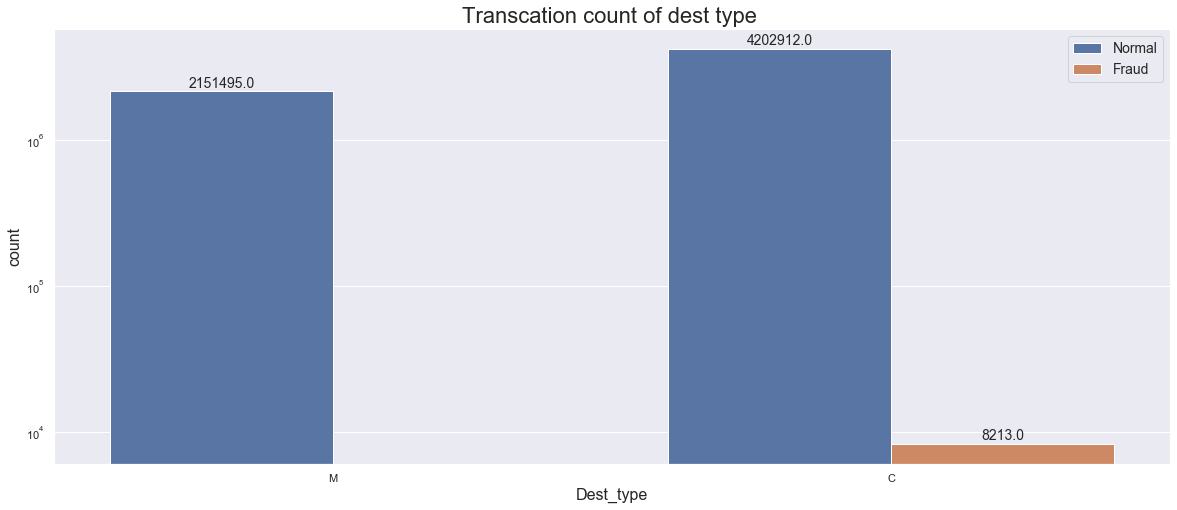

In [214]:
display(pd.crosstab(df.Dest_type, df.isFraud))
plt.figure(figsize = (20, 8))
ax = sns.countplot(x = "Dest_type", hue = "isFraud",data = df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height),
                xy = (p.get_x() + p.get_width() / 2, height),
                ha = 'center',
                va = 'bottom', 
                xytext = (0, 1), # distance with bar 
                textcoords = 'offset points',
                fontsize= 14)
plt.yscale("log") # to show y-axis as log scale
plt.xlabel("Dest_type", fontsize = 16)
plt.ylabel("count", fontsize = 16)
plt.title("Transcation count of dest type ", fontsize = 22)
plt.legend(["Normal","Fraud"],fontsize = 14)
plt.show()

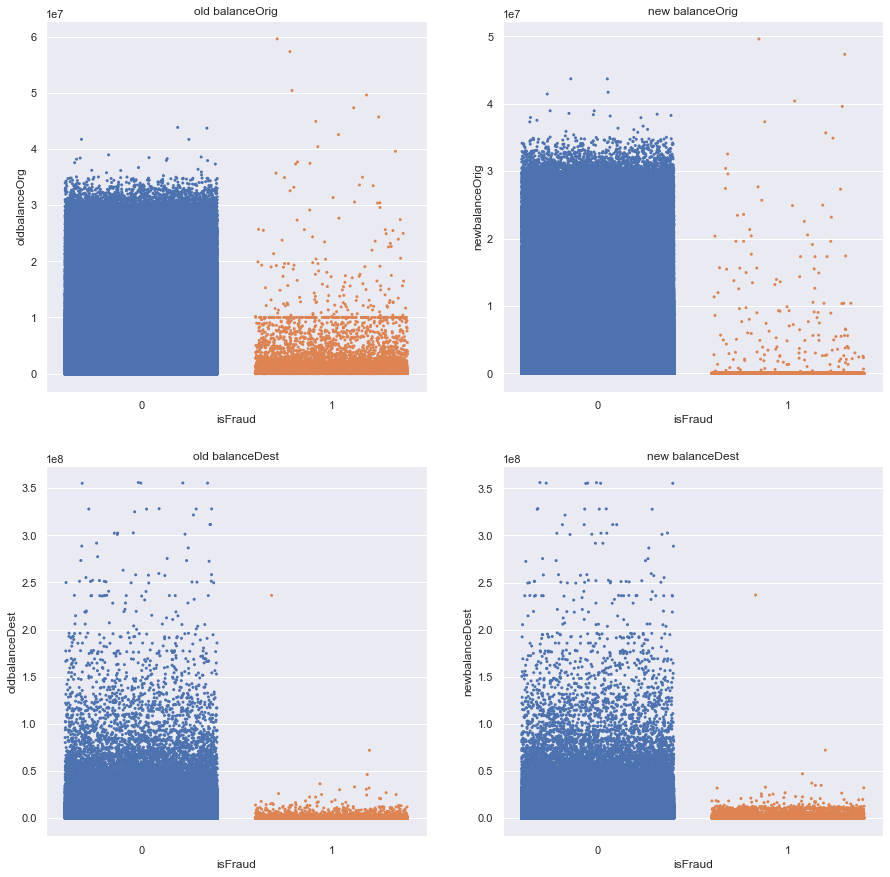

In [179]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
a = sns.stripplot(data = df, y = "oldbalanceOrg", x = "isFraud", jitter = 0.4, size = 3,ax = axs[0][0])
axs[0][0].set_title("old balanceOrig")
b = sns.stripplot(data = df, y = "newbalanceOrig", x = "isFraud", jitter = 0.4, size = 3,ax = axs[0][1])
axs[0][1].set_title("new balanceOrig")
c = sns.stripplot(data = df, y = "oldbalanceDest", x = "isFraud", jitter = 0.4, size = 3,ax = axs[1][0])
axs[1][0].set_title("old balanceDest")
d = sns.stripplot(data = df, y = "newbalanceDest", x = "isFraud", jitter = 0.4, size = 3,ax = axs[1][1])
axs[1][1].set_title("new balanceDest")
plt.show()

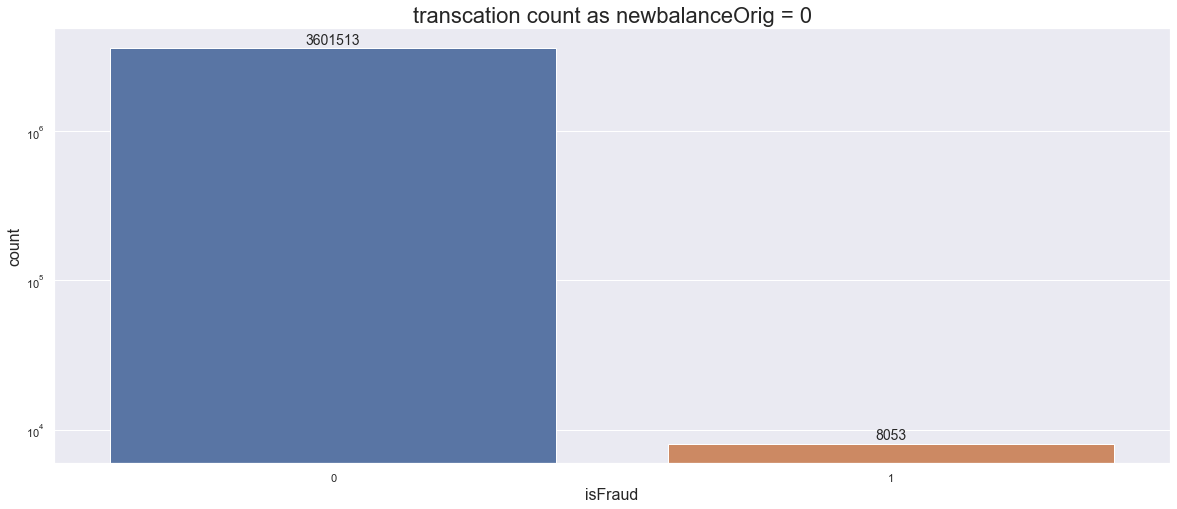

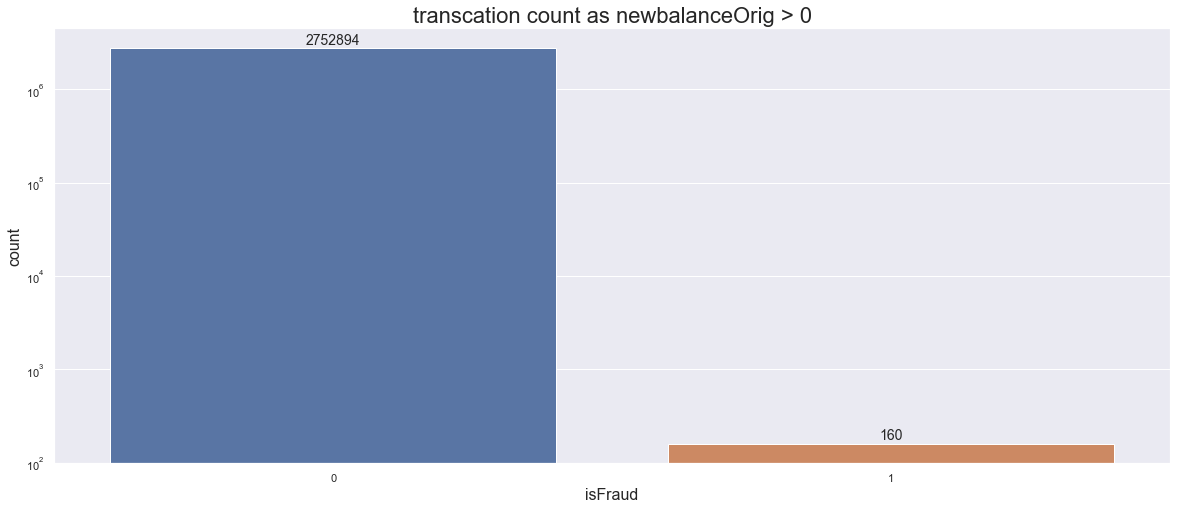

In [221]:
plt.figure(figsize = (20, 8))
ax = sns.countplot(data = df[(df["newbalanceOrig"]== 0)], x = "isFraud")
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height),
                xy = (p.get_x() + p.get_width() / 2, height),
                ha = 'center',
                va = 'bottom', 
                xytext = (0, 1), # distance with bar 
                textcoords = 'offset points',
                fontsize= 14)
plt.yscale("log")
plt.title("transcation count as newbalanceOrig = 0", fontsize = 22)
plt.xlabel("isFraud", fontsize = 16)
plt.ylabel("count", fontsize = 16)
plt.show()

plt.figure(figsize = (20, 8))
ax = sns.countplot(data = df[(df["newbalanceOrig"]> 0)], x = "isFraud")    
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height),
                xy = (p.get_x() + p.get_width() / 2, height),
                ha = 'center',
                va = 'bottom', 
                xytext = (0, 1), # distance with bar 
                textcoords = 'offset points',
                fontsize= 14)
plt.yscale("log")
plt.title("transcation count as newbalanceOrig > 0", fontsize = 22)
plt.xlabel("isFraud", fontsize = 16)
plt.ylabel("count", fontsize = 16)
plt.show()

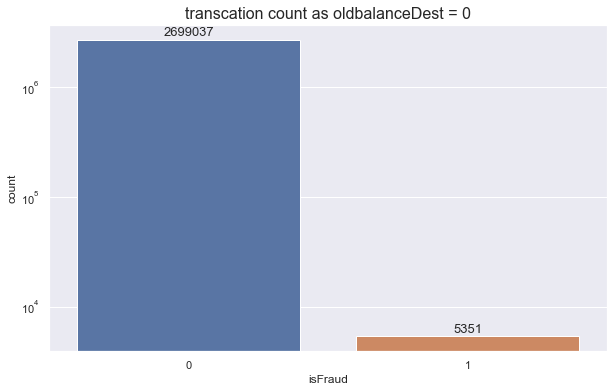

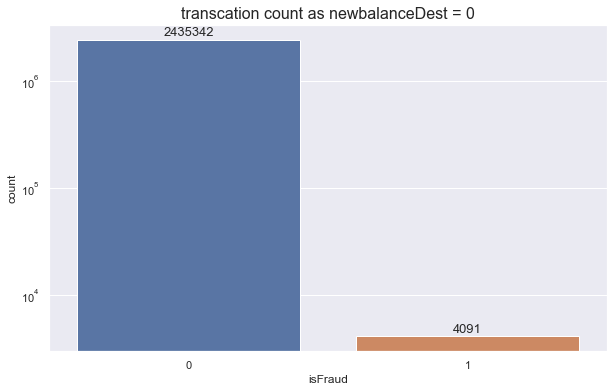

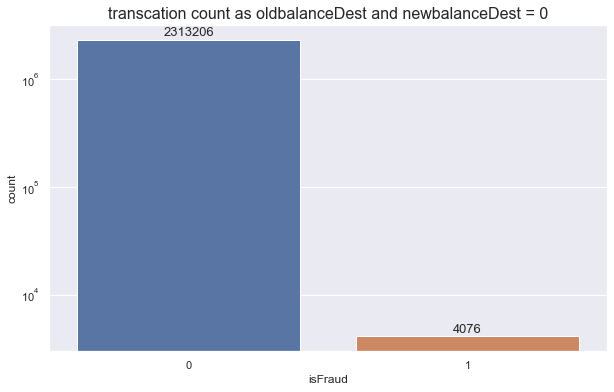

In [172]:
plt.figure(figsize = (20, 8))
ax = sns.countplot(data = df[(df["oldbalanceDest"]== 0)], x = "isFraud")
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height),
                xy = (p.get_x() + p.get_width() / 2, height),
                ha = 'center',
                va = 'bottom', 
                xytext = (0, 1), # distance with bar 
                textcoords = 'offset points',
                fontsize= 13)
plt.yscale("log")
plt.title("transcation count as oldbalanceDest = 0", fontsize = 16)
plt.show()

plt.figure(figsize = (20, 8))
ax = sns.countplot(data = df[(df["newbalanceDest"]== 0)], x = "isFraud")    
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height),
                xy = (p.get_x() + p.get_width() / 2, height),
                ha = 'center',
                va = 'bottom', 
                xytext = (0, 1), # distance with bar 
                textcoords = 'offset points',
                fontsize= 13)
plt.yscale("log")
plt.title("transcation count as newbalanceDest = 0", fontsize = 16)
plt.show()

plt.figure(figsize = (20, 8))
ax = sns.countplot(data = df[(df["oldbalanceDest"]==0)&(df["newbalanceDest"]==0)], x = "isFraud")    
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height),
                xy = (p.get_x() + p.get_width() / 2, height),
                ha = 'center',
                va = 'bottom', 
                xytext = (0, 1), # distance with bar 
                textcoords = 'offset points',
                fontsize= 13)
plt.yscale("log")
plt.title("transcation count as oldbalanceDest and newbalanceDest = 0", fontsize = 16)
plt.show()

In [136]:
df_down = df[((df.type == "TRANSFER")|(df.type == "CASH_OUT"))&(df.Dest_type != "M")]

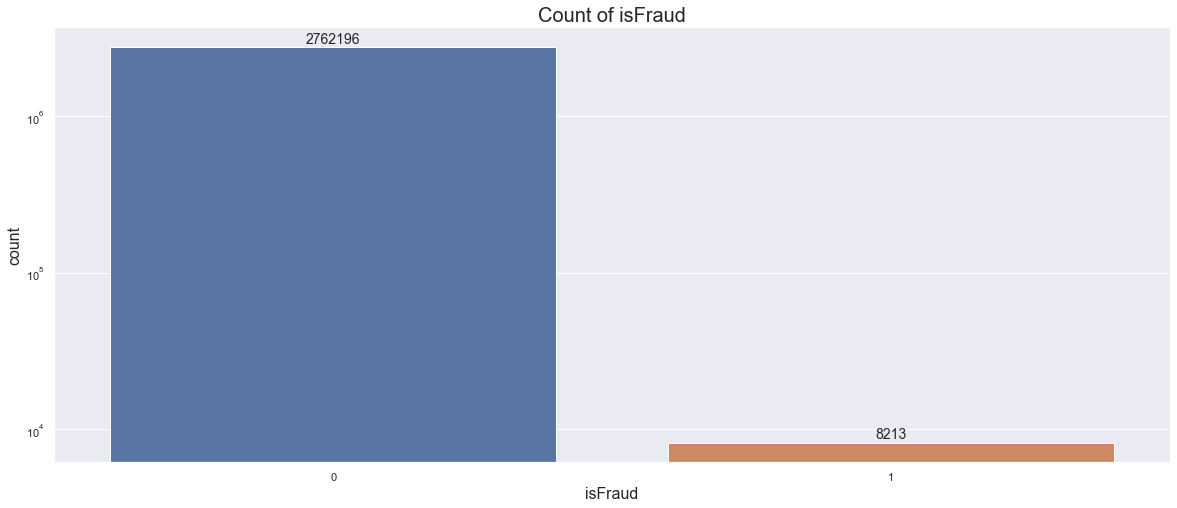

In [219]:
plt.figure(figsize = (20, 8))
ax = sns.countplot(x = "isFraud", data = df_down)
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height),
                xy = (p.get_x() + p.get_width() / 2, height),
                ha = 'center',
                va = 'bottom', 
                xytext = (0, 1), # distance with bar 
                textcoords = 'offset points',
                fontsize= 14)
plt.yscale("log") # to show y-axis as log scale
plt.title("Count of isFraud",fontsize = 20)
plt.xlabel("isFraud", fontsize = 16)
plt.ylabel("count", fontsize = 16)
plt.show()